## Description

This notebook performs EDA on data collected from 3 weeks from STA API

In [1]:
from tqdm import tqdm
import os 
import json
import nltk 
import pandas as pd
from nltk import sent_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import  Counter

In [3]:
df = pd.DataFrame(columns=['id','category','text'])
df2 = pd.DataFrame(columns=['id','doc_len'])

In [4]:
src_dir = './data/news/'
cat_dict = {}
for file in tqdm(os.listdir(src_dir),total=len(os.listdir(src_dir))):
    with open(os.path.join(src_dir,file),'r') as f:
        d = json.load(f)
    if 'text' in d:
        doc = d['text']
        for c in d['categories']:
            if c in cat_dict:
                cat_dict[c] += 1
            else:
                cat_dict[c] = 1
cat_dict

100%|██████████| 721/721 [00:02<00:00, 330.40it/s]


{'MP': 200,
 'KU': 19,
 'AN': 55,
 'NP': 26,
 'SP': 151,
 'PT': 42,
 'GO': 55,
 'DZ': 7,
 'KR': 53,
 'GS': 9,
 'ZP': 34,
 'ZT': 7}

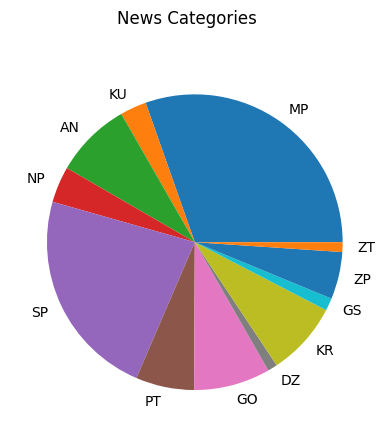

In [4]:
plt.pie(list(cat_dict.values()),labels=list(cat_dict.keys()))
plt.suptitle('News Categories')
plt.show()

In [5]:
src_dir = './data/news/'
doc_length = []
for file in tqdm(os.listdir(src_dir),total=len(os.listdir(src_dir))):
    with open(os.path.join(src_dir,file),'r') as f:
        d = json.load(f)
    if 'text' in d:
        c = d['categories'][0]
        i = d['id']
        doc = d['text']
        df2 = pd.concat([df2, pd.DataFrame([{'id':i,'doc_len':len(doc)}])],ignore_index=True)
        for sent in sent_tokenize(doc.strip().lower().replace(' .', '.'),language='slovene'):
            new_row = {'id':i,'category':c,'text':sent}
            df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

100%|██████████| 721/721 [00:04<00:00, 150.53it/s]


In [6]:
df

,id,category,text
0,311896,MP,"bruselj, 28. novembra (sta) - potem ko so tri ..."
1,311896,MP,***\n\tmedtem ko glede procesa potrjevanja pri...
2,311896,MP,"češka, poljska in madžarska bodo po načrtih no..."
3,311896,MP,zda so po dolgtrajnem nasprotovanju in ugovarj...
4,311896,MP,"američani so namreč zadnje dva meseca, odkar s..."
...,...,...,...
7433,315144,MP,v tem letu so zabeležili le sedem primerov te ...
7434,315144,MP,še leta 1996 je bilo v evropi zabeleženih 193 ...
7435,315144,MP,po dittmannovi oceni je k temu prispevala pred...
7436,315144,MP,zato v albaniji in njenih mejnih državah prav ...


In [9]:
df.iloc[3281,:]['text']

'* lestvice:\n- skupni seštevek (moški) po osmih tekmah:\n 1. hermann maier              avt    429 točk\n 2. stefan eberharter          avt    346\n 3. kjetil-andre aamodt        nor    297\n 4. josef strobl               avt    276\n 5. michael von gruenigen      švi    274\n 6. andreas schifferer         avt    221\n 7. steve locher               švi    199\n 8. hans knauss                avt    175\n 9. kristian ghedina           ita    160\n10. paul accola                švi    156\n11. lasse kjus                 nor    150\n12. christian mayer            avt    132\n13. thomas stangassinger       avt    122\n14. urs kaelin                 švi    109\n15. thomas grandi              kan    108\n- skupni seštevek v veleslalomu po treh tekmah:\n 1. michael von gruenigen      švi    200\n 2. stefan eberharter          avt    180\n 3. hermann maier              avt    160\n 4. steve locher               švi    141\n 5. kjetil-andre aamodt        nor    109\n    urs kaelin              

In [8]:
df['text'].str.len().argmax()

3281

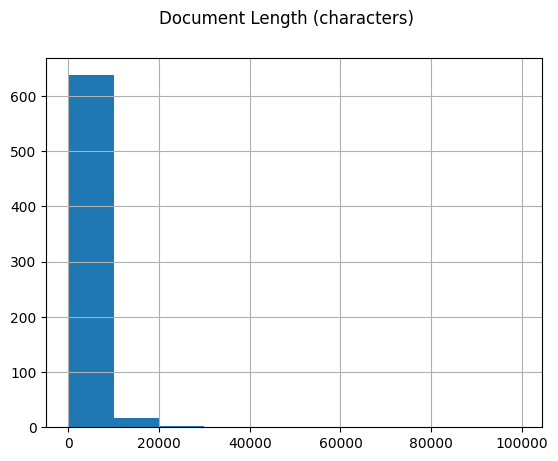

In [10]:
df2['doc_len'].hist()
plt.suptitle('Document Length (characters)')
plt.show()

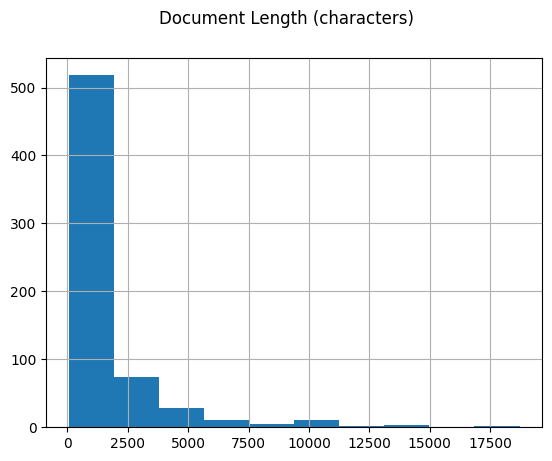

In [11]:
df2['doc_len'][df2['doc_len'] <= 20000].hist()
plt.suptitle('Document Length (characters)')
plt.show()

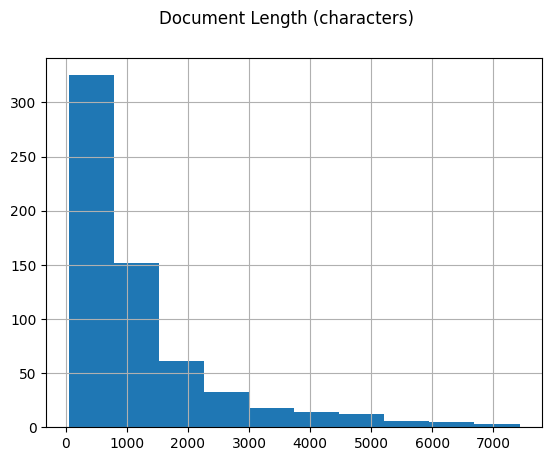

In [12]:
df2['doc_len'][df2['doc_len'] <= 7500].hist()
plt.suptitle('Document Length (characters)')
plt.show()

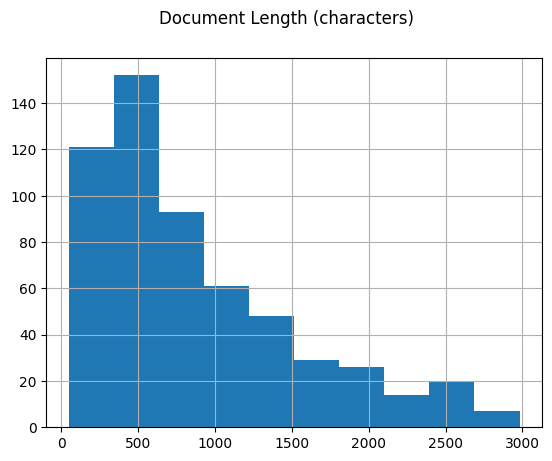

In [13]:
df2['doc_len'][df2['doc_len'] <= 3000].hist()
plt.suptitle('Document Length (characters)')
plt.show()

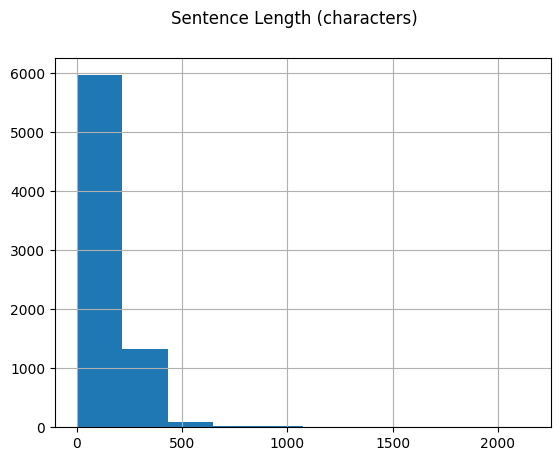

In [14]:
df['text'].str.len().hist()
plt.suptitle('Sentence Length (characters)')
plt.show()

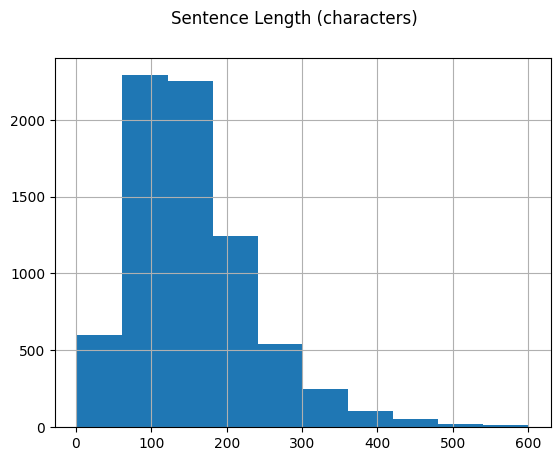

In [15]:
df['text'].str.len()[df['text'].str.len() <= 600].hist()
plt.suptitle('Sentence Length (characters)')
plt.show()

In [16]:
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

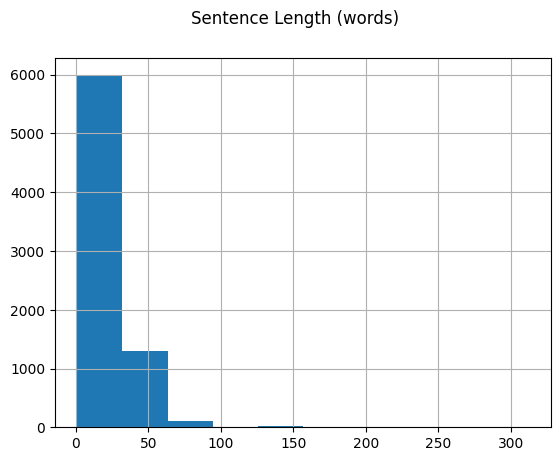

In [17]:
df['text'].str.split().map(lambda x: len(x)).hist()
plt.suptitle('Sentence Length (words)')
plt.show()

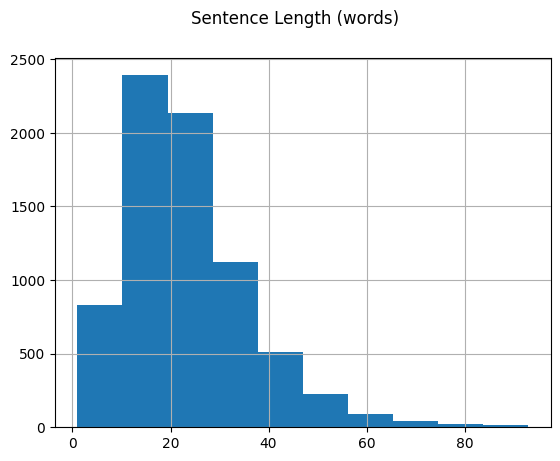

In [18]:
ll = df['text'].str.split().map(lambda x: len(x))
ll[ll < 100].hist()
plt.suptitle('Sentence Length (words)')
plt.show()

In [6]:
stop=set(stopwords.words('slovene'))

In [8]:
corpus=[]
new= df['text'].map(lambda x: x.replace('-','')).str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

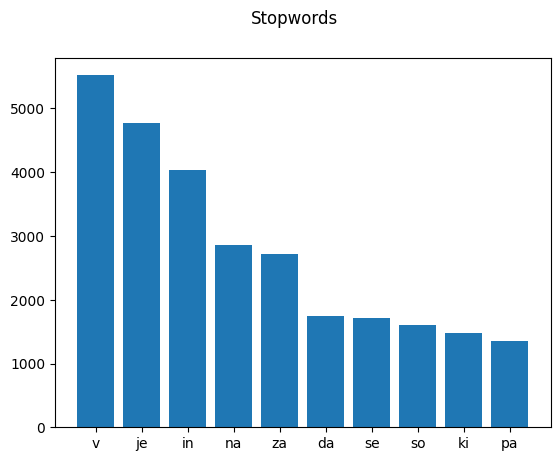

In [9]:
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)
plt.suptitle('Stopwords')
plt.show()

Text(0.5, 0.98, 'Most common words')

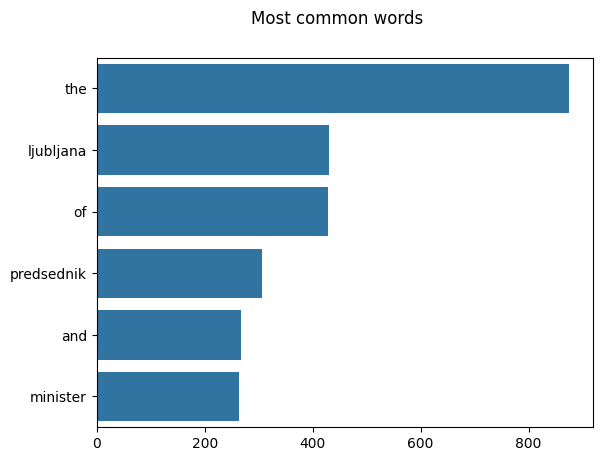

In [10]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)
plt.suptitle('Most common words')

Remove stop words

In [18]:
new_corp = []
for i, l in enumerate(df['text'].map(lambda x: x.replace('-','')).str.split()):
    new_l = ""
    for w in l:
        if w in stop:
            continue
        else:
            new_l += (w + ' ')
    new_corp.append(new_l[:-1])

In [20]:
df['filtered_text'] = new_corp

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
def plot_top_ngrams_barchart(text, n=2):
    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

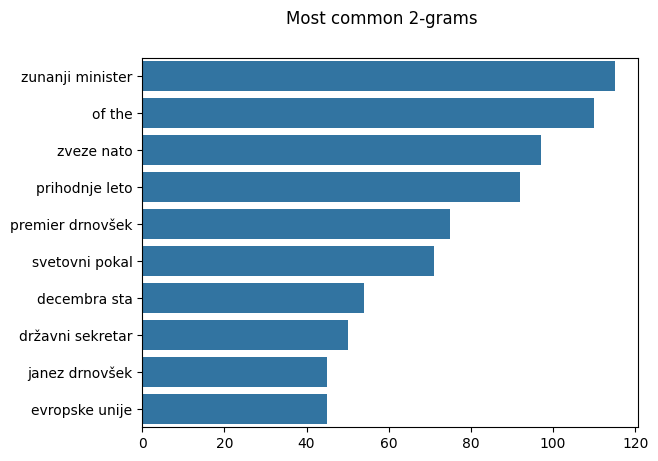

In [22]:
plot_top_ngrams_barchart(df['filtered_text'],2)
plt.suptitle('Most common 2-grams')
plt.show()

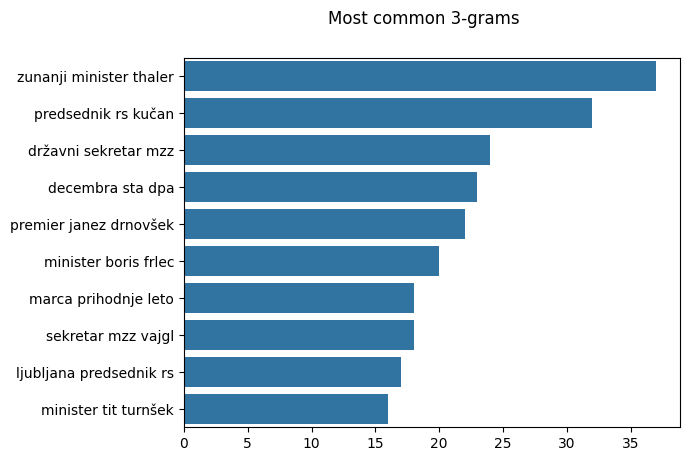

In [23]:
plot_top_ngrams_barchart(df['filtered_text'],3)
plt.suptitle('Most common 3-grams')
plt.show()

In [24]:
import numpy as np
import nltk
from nltk.corpus import stopwords
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim


def get_lda_objects(text):
    nltk.download('stopwords')    
    stop=set(stopwords.words('slovene'))

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news,language='slovene') if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
    return vis

In [25]:
lda_model, bow_corpus, dic = get_lda_objects(df['filtered_text'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ILLIA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
lda_model.show_topics()

[(0,
  '0.005*"držav" + 0.005*"nato" + 0.004*"minister" + 0.004*"predsednik" + 0.003*"ljubljana" + 0.003*"slovenija" + 0.003*"zveze" + 0.003*"leto" + 0.003*"100" + 0.003*"zunanji"'),
 (1,
  '0.022*"the" + 0.007*"and" + 0.004*"slovenia" + 0.003*"for" + 0.003*"that" + 0.003*"will" + 0.002*"ljubljana" + 0.002*"slovene" + 0.002*"leta" + 0.002*"with"'),
 (2,
  '0.003*"avt" + 0.003*"predsednik" + 0.003*"ljubljana" + 0.002*"odstotka" + 0.002*"slovenije" + 0.002*"hrvaškem" + 0.002*"odstotkov" + 0.002*"leta" + 0.002*"zakona" + 0.002*"sporazuma"'),
 (3,
  '0.006*"ljubljana" + 0.003*"minister" + 0.002*"slovenije" + 0.002*"obisku" + 0.002*"predsednika" + 0.002*"predsednik" + 0.002*"nato" + 0.002*"leto" + 0.002*"slovenija" + 0.002*"premier"')]

In [27]:
plot_lda_vis(lda_model, bow_corpus, dic)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.080746  0.101415       1        1  28.991053
1      0.171528  0.016390       2        1  26.647603
2     -0.045600 -0.130999       3        1  23.624142
3     -0.045182  0.013194       4        1  20.737201, topic_info=          Term        Freq       Total Category  logprob  loglift
442        the  684.000000  684.000000  Default  30.0000  30.0000
433        and  211.000000  211.000000  Default  29.0000  29.0000
2991  slovenia  126.000000  126.000000  Default  28.0000  28.0000
457        for  104.000000  104.000000  Default  27.0000  27.0000
468       that   94.000000   94.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
424       leta   33.525222  196.132338   Topic4  -6.5781  -0.1933
331     države   31.128360  156.472935   Topic4  -6.6522  -0.0415
1614     mesto   29.498684  126.130229   Topic4  -6.7060   0.1203
514        več   29.635942  191.598265   Topic4  -6.7014  -0.2932
320      dejal   27.038559  135.998525   Topic4  -6.7931  -0.0421

[299 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
3716       1  0.820564          100
3716       2  0.040622          100
3716       3  0.089368          100
3716       4  0.056871          100
3170       2  0.180988          200
...      ...       ...          ...
1228       3  0.087219     članstvu
84         1  0.946542  širitvenega
10535      3  0.855687          šve
10535      4  0.116685          šve
16076      3  0.988835          švi

[531 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4])

In [29]:
filtered_corpus = [word for word in corpus if not word in stop]

In [30]:
from wordcloud import WordCloud, STOPWORDS
#stopwords = set(STOPWORDS)
 
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(stopwords.words('slovene')),#stopwords,
        max_words=100,
        max_font_size=60,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(8,8))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

c:\Users\ILLIA\anaconda3\envs\sloner10\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


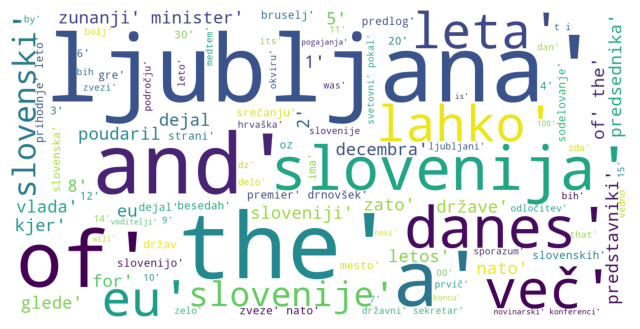

In [33]:
show_wordcloud(filtered_corpus)

In [34]:
import spacy

nlp = spacy.load("sl_core_news_sm")

In [37]:
doc=nlp(df['text'][226])
ne = [(x.text,x.label_) for x in doc.ents]
if len(ne) > 1:
    print(i,ne)

1894 [('slovenijo', 'LOC'), ('bruslju', 'LOC'), ('boris cizelj', 'PER'), ('eu', 'ORG')]


In [38]:
from spacy import displacy

displacy.render(doc, style='ent')

c:\Users\ILLIA\anaconda3\envs\sloner10\lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


In [35]:
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

ent=df['filtered_text'].apply(lambda x : ner(x))
ent=[x for sub in ent for x in sub]

counter=Counter(ent)
count=counter.most_common()

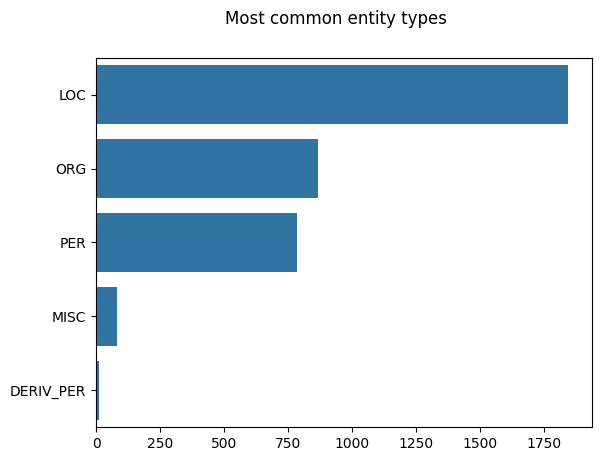

In [36]:
x,y=map(list,zip(*count))
sns.barplot(x=y,y=x)
plt.suptitle('Most common entity types')
plt.show()

In [37]:
def ner(text,ent="LOC"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

gpe=df['filtered_text'].apply(lambda x: x.replace('_','')).apply(lambda x: ner(x))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)

x,y=map(list,zip(*counter.most_common(10)))

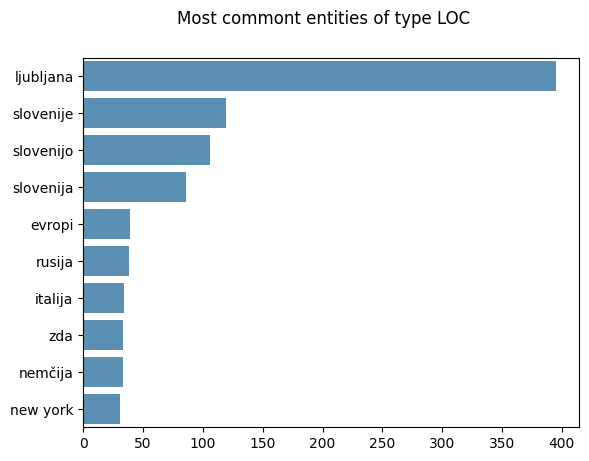

In [38]:
sns.barplot(x=y, y=x, alpha=0.8)
plt.suptitle('Most commont entities of type LOC')
plt.show()

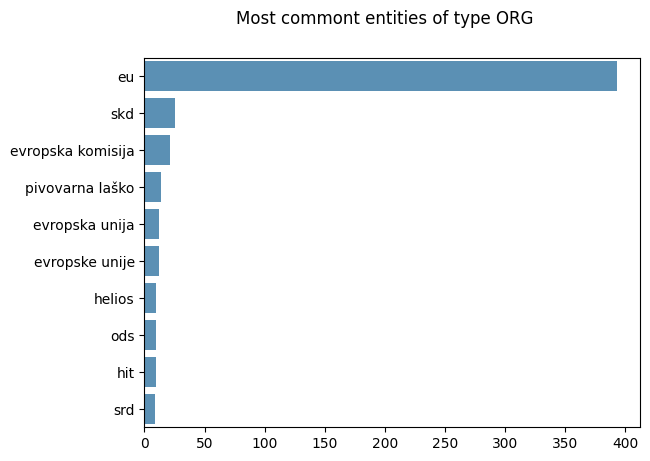

In [39]:
gpe=df['filtered_text'].apply(lambda x: ner(x,'ORG'))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(x=y, y=x, alpha=0.8)
plt.suptitle('Most commont entities of type ORG')
plt.show()

In [40]:
def pos(text):
    pos=nltk.pos_tag(word_tokenize(text,language='slovene'))
    pos=list(map(list,zip(*pos)))[1]
    return pos

tags=df['filtered_text'].apply(lambda x: x.replace(',','')).apply(lambda x: x.replace('.','')).apply(lambda x : pos(x))
tags=[x for l in tags for x in l]
counter=Counter(tags)

x,y=list(map(list,zip(*counter.most_common(3))))

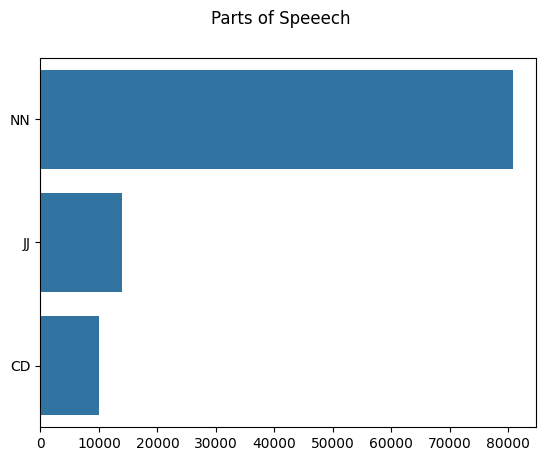

In [41]:
sns.barplot(x=y,y=x)
plt.suptitle('Parts of Speeech')
plt.show()

In [42]:
def get_adjs(text):
    adj=[]
    pos=nltk.pos_tag(word_tokenize(text,language='slovene'))
    for word,tag in pos:
        if tag=='NN':
            adj.append(word)
    return adj
words=df['filtered_text'].apply(lambda x : get_adjs(x))
words=[x for l in words for x in l]
counter=Counter(words)

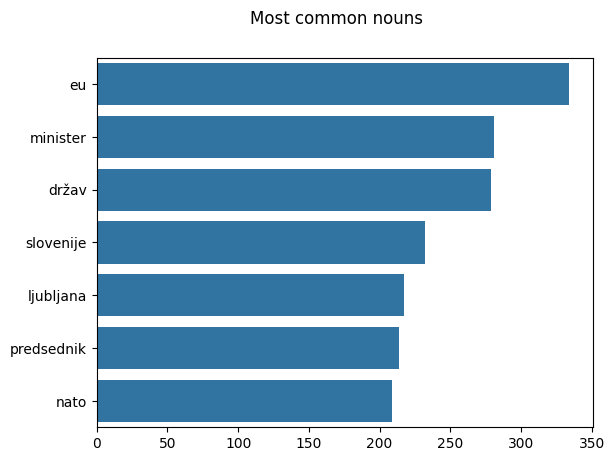

In [43]:
x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)
plt.suptitle('Most common nouns')
plt.show()